<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/Sistemas_EDOs_PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Euler Explícito

In [1]:
import numpy as np

def metodo_euler_explicito(t0, y0, n, h):
    # t0 = valor inicial para t
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y)

    # Inicializa o contador e os vetores de saída para t e y
    k = 0
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa x e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        y[i+1,:] = y[i,:] + h * getf(y[i,:]) # Atualiza o valor de y usando o método de Euler explícito
        t[i+1] = t[i] + h                    # Incrementa o valor de t

    # Retorna os vetores de saída com os valores de t e y calculados
    return t, y




---

**Exemplo:** Resolva o sistema de EDO's a seguir usando **Euler Explícito**

$\begin{cases}
 \frac{dx}{dt}=-5x + y \\
 \frac{dy}{dt}= -\frac{1}{2}y \\
\end{cases}$

Com condição inicial $x(0)=y(0)=1$.

---



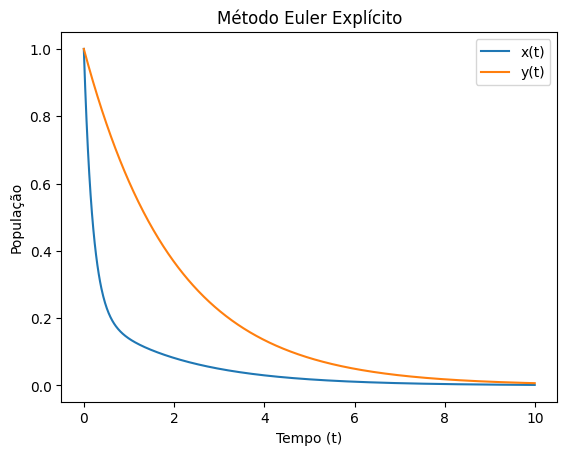

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(z):
    x = z[0]
    y = z[1]
    dxdt = -5*x+y
    dydt = -0.5*y
    f = np.array([dxdt, dydt])
    return f

# Definir condições iniciais
z0 = np.array([1,1])

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 1000     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z = metodo_euler_explicito(t0, z0, n, h)

# Plotar o gráfico
plt.plot(t,z)
plt.title('Método Euler Explícito')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])
plt.show()

# Método de Euler Implícito

In [3]:
import numpy as np

def metodo_euler_implicito(t0, y0, n, h):
    # t0 = valor inicial para t
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getf(y) e getJ(y)

    # Inicializar os vetores de saída para t e y
    neq = len(y0)
    t = np.zeros(n)
    y = np.zeros((n,neq))

    # Definir condição iniciais do PVI e tolerância
    t[0] = t0
    y[0,:] = y0

    # Definir tolerância e máximo de iterações
    tol = 1e-8
    kmax = 100

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1]
        k = 0
        y[i+1,:] = y[i,:]   #(Método de Continuação de Ordem Zero)
        t[i+1] = t[i] + h

        # Calcular f e df do Método de Euler Implícito no chute inicial de y[i+1]
        R = y[i+1,:]-y[i,:]-h*getf( y[i+1,:])

        # Fazer iterações de Newton até convergir y[i+1]
        while np.linalg.norm(R) > tol:

            # Calcular a Matriz Jacobiana
            J = np.eye(neq)-h*getJ( y[i+1,:])

            # Resolver o Sistema Linear
            del_y = -np.linalg.solve(J, R)

            # Atualizar y[i+1] pelo Método de Newton
            y[i+1,:] = y[i+1,:] + del_y

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1,:]-y[i,:]-h*getf(y[i+1,:])
            if k > kmax:
                print('Não convergiu.')
            break

    return t, y




---

**Exemplo:** Resolva o sistema de EDO's a seguir usando **Euler Implícito**

$\begin{cases}
 \frac{dx}{dt}=-5x^2 + y \\
 \frac{dy}{dt}= -\frac{1}{2}y^2 \\
\end{cases}$

Com condição inicial $x(0)=y(0)=1$.

---



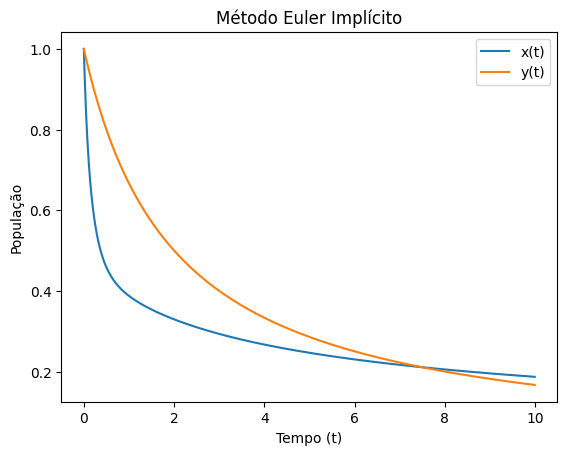

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(z):
    x = z[0]
    y = z[1]
    dxdt = -5*x**2+y
    dydt = -0.5*y**2
    f = np.array([dxdt, dydt])
    return f

# Definir o Jacobiano do sistema de EDOs
def getJ(z):
    x = z[0]
    y = z[1]
    J = np.zeros((2,2))
    J[0,0] = -5*x
    J[0,1] = 1
    J[1,0] = 0
    J[1,1] = -0.5*y
    return J

# Definir condições iniciais
z0 = np.array([1,1])

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 1000     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z = metodo_euler_implicito(t0, z0, n, h)

# Plotar o gráfico
plt.plot(t,z)
plt.title('Método Euler Implícito')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])
plt.show()

# Método Predição-Correção (Heun)

In [5]:
import numpy as np

def metodo_heun(t0, y0, n, h):
    # t0 = valor inicial para t
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y)

    # Inicializa os vetores de saída para t e y
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa x e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Predizer o valor de y usando Euler Explícito
        yp = y[i,:] + h * getf(y[i,:])

        # Corrigir o valor de y usando Euler "Implícito"
        yc = y[i,:] + h * getf(yp)

        # Atualizar y[i+1] como a média da predição-correção
        y[i+1,:] = (yp+yc)/2

        t[i+1] = t[i] + h    # Incrementa o valor de t

    # Retorna os vetores de saída com os valores de t e y calculados
    return t, y



---

**Exemplo:** Resolva o sistema de EDO's a seguir usando **Predição-Correção (Heun)**

$\begin{cases}
 \frac{dx}{dt}=-5x^2 + y \\
 \frac{dy}{dt}= -\frac{1}{2}y^2 \\
\end{cases}$

Com condição inicial $x(0)=y(0)=1$.

---



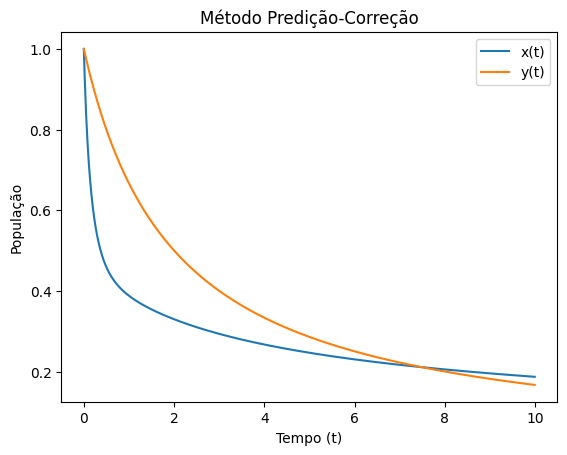

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(z):
    x = z[0]
    y = z[1]
    dxdt = -5*x**2+y
    dydt = -0.5*y**2
    f = np.array([dxdt, dydt])
    return f

# Definir condições iniciais
z0 = np.array([1,1])

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 1000     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z = metodo_heun(t0, z0, n, h)

# Plotar o gráfico
plt.plot(t,z)
plt.title('Método Predição-Correção')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])
plt.show()

# Método de Runge-Kutta 4a Ordem

In [7]:
import numpy as np

def metodo_Runge_Kutta(x0, y0, n, h):
    # t0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y)

    # Inicializa os vetores de saída para t e y
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa x e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Avaliar as funções de Runge-Kutta
        k1 = getf(y[i,:])
        k2 = getf(y[i,:] + h*k1/2)
        k3 = getf(y[i,:] + h*k2/2)
        k4 = getf(y[i,:] + h*k3)

        # Atualizar y[i+1] pela média ponderada
        y[i+1,:] = y[i,:] + (h/6) *(k1 + 2*k2 + 2*k3 + k4)

        t[i+1] = t[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return t, y




---

**Exemplo:** Resolva o sistema de EDO's a seguir usando **Runge-Kutta 4a Ordem**

$\begin{cases}
 \frac{dx}{dt}=-5x^2 + y \\
 \frac{dy}{dt}= -\frac{1}{2}y^2 \\
\end{cases}$

Com condição inicial $x(0)=y(0)=1$.

---



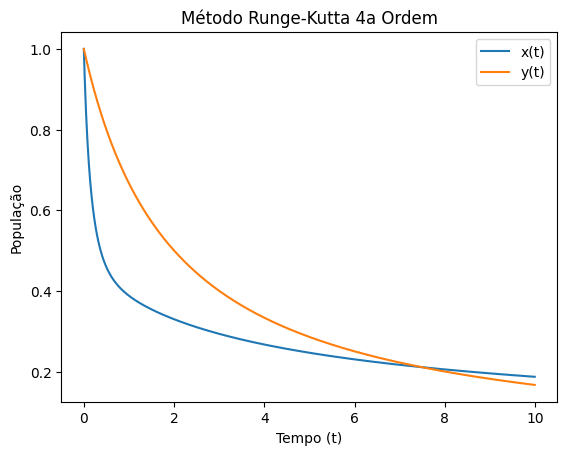

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(z):
    x = z[0]
    y = z[1]
    dxdt = -5*x**2+y
    dydt = -0.5*y**2
    f = np.array([dxdt, dydt])
    return f

# Definir condições iniciais
z0 = np.array([1,1])

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 1000     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z = metodo_Runge_Kutta(t0, z0, n, h)

# Plotar o gráfico
plt.plot(t,z)
plt.title('Método Runge-Kutta 4a Ordem')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])
plt.show()